<a href="https://colab.research.google.com/github/kwansawanth/expAI/blob/main/Copy_of_SHAP_multi_Gender(ITC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SHAP

## Import data set (เรียกใช้ CSV)

In [13]:
import pandas as pd
import shutil

In [14]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## เลือกข้อมูล ทำ Background data ของ data train

In [15]:
dt_train = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Table_train_Predict.csv')
dt_train

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Fold,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V1.jpg,2,0,Female,7.107492,7.0,0.000003,Female,0.0
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV1.jpg,4,0,Female,7.020138,7.0,0.000025,Female,0.0
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V2.jpg,10,0,Female,6.975561,7.0,0.000808,Female,0.0
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV2.jpg,9,0,Female,6.938187,7.0,0.000107,Female,0.0
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V3.jpg,10,0,Female,6.916692,7.0,0.000014,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,4184,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J375.jpg,3,1,Male,25.299234,25.0,0.999988,Male,1.0
4185,4185,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J437.jpg,5,1,Male,24.729193,25.0,0.999987,Male,1.0
4186,4186,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J480.jpg,5,1,Male,24.564425,25.0,1.000000,Male,1.0
4187,4187,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J491.jpg,6,1,Male,24.113144,24.0,1.000000,Male,1.0


In [16]:
df = dt_train.drop(dt_train.columns[0], axis=1)
df

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Fold,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V1.jpg,2,0,Female,7.107492,7.0,0.000003,Female,0.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV1.jpg,4,0,Female,7.020138,7.0,0.000025,Female,0.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V2.jpg,10,0,Female,6.975561,7.0,0.000808,Female,0.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV2.jpg,9,0,Female,6.938187,7.0,0.000107,Female,0.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V3.jpg,10,0,Female,6.916692,7.0,0.000014,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J375.jpg,3,1,Male,25.299234,25.0,0.999988,Male,1.0
4185,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J437.jpg,5,1,Male,24.729193,25.0,0.999987,Male,1.0
4186,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J480.jpg,5,1,Male,24.564425,25.0,1.000000,Male,1.0
4187,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J491.jpg,6,1,Male,24.113144,24.0,1.000000,Male,1.0


In [17]:
# นับรูป
# Get unique age values
unique_ages = dt_train['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'M' gender
for age in unique_ages:
    shape = dt_train[(dt_train['Age(year)'] == age) & (dt_train['Gender'] == 'M')].shape
    print(f"Age {age}: {shape}")

# Get unique age values
unique_ages = dt_train['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'F' gender
for age in unique_ages:
    shape = dt_train[(dt_train['Age(year)'] == age) & (dt_train['Gender'] == 'F')].shape
    print(f"Age {age}: {shape}")

Age 7: (111, 15)
Age 8: (116, 15)
Age 9: (122, 15)
Age 10: (114, 15)
Age 11: (114, 15)
Age 12: (119, 15)
Age 13: (106, 15)
Age 14: (110, 15)
Age 15: (110, 15)
Age 16: (112, 15)
Age 17: (107, 15)
Age 18: (104, 15)
Age 19: (107, 15)
Age 20: (105, 15)
Age 21: (107, 15)
Age 22: (97, 15)
Age 23: (108, 15)
Age 24: (104, 15)
Age 25: (96, 15)
Age 7: (114, 15)
Age 8: (116, 15)
Age 9: (120, 15)
Age 10: (116, 15)
Age 11: (117, 15)
Age 12: (117, 15)
Age 13: (108, 15)
Age 14: (113, 15)
Age 15: (117, 15)
Age 16: (118, 15)
Age 17: (112, 15)
Age 18: (128, 15)
Age 19: (115, 15)
Age 20: (99, 15)
Age 21: (100, 15)
Age 22: (105, 15)
Age 23: (101, 15)
Age 24: (91, 15)
Age 25: (113, 15)


In [18]:
# เลือกรูปจาก train มาทำ bg data
import pandas as pd
import random

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Age(year)': dt_train['Age(year)'],
    'Gender': dt_train['Gender'],
    'Folder_type': dt_train['Folder_type'],
    'Folder_name': dt_train['Folder_name'],
    'Path_Name': dt_train['Path_Name'],
    'Filename': dt_train['Filename'],
}

df = pd.DataFrame(data)

# Calculate the desired number of rows per unique age
desired_per_age = 2660 // (25 - 7 + 1)

# Initialize a list to store selected rows
selected_rows = []

# Iterate through unique age values
for age in range(7, 26):
    # Get all rows with the current age
    age_rows = df[df['Age(year)'] == age]

    # Randomly shuffle the rows for this age
    age_rows = age_rows.sample(frac=1, random_state=42)

    # Determine the number of rows to select for each gender
    rows_per_gender = desired_per_age // 2

    # Select rows for both "Male" and "Female" genders
    selected_male_rows = age_rows[age_rows['Gender'] == 'M'].head(rows_per_gender)
    selected_female_rows = age_rows[age_rows['Gender'] == 'F'].head(rows_per_gender)

    # Append the selected rows to the list
    selected_rows.extend([selected_male_rows, selected_female_rows])

# Concatenate the selected rows for each age into a final DataFrame
selected_dft = pd.concat(selected_rows)

# Now, selected_df contains 950 rows with an approximately even distribution of ages from 7 to 25
# and an equal number of "Male" and "Female" samples for each age.


In [19]:
selected_dft

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename
184,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV116.jpg
120,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV13.jpg
207,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV244.jpg
148,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV50.jpg
214,7,M,Normal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV28.jpg
...,...,...,...,...,...,...
4050,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J245.jpg
4044,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J218.jpg
4024,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J148.jpg
4020,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J144.jpg


In [20]:
#selected_dft.to_csv('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Bg_train.csv')  # Setting index=False to avoid saving the row numbers as a column

In [21]:
# Get unique age values
unique_ages = selected_dft['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'M' gender
for age in unique_ages:
    shape = selected_dft[(selected_dft['Age(year)'] == age) & (selected_dft['Gender'] == 'M')].shape
    print(f"Age {age}: {shape}")

# Get unique age values
unique_ages = selected_dft['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'F' gender
for age in unique_ages:
    shape = selected_dft[(selected_dft['Age(year)'] == age) & (selected_dft['Gender'] == 'F')].shape
    print(f"Age {age}: {shape}")

Age 7: (70, 6)
Age 8: (70, 6)
Age 9: (70, 6)
Age 10: (70, 6)
Age 11: (70, 6)
Age 12: (70, 6)
Age 13: (70, 6)
Age 14: (70, 6)
Age 15: (70, 6)
Age 16: (70, 6)
Age 17: (70, 6)
Age 18: (70, 6)
Age 19: (70, 6)
Age 20: (70, 6)
Age 21: (70, 6)
Age 22: (70, 6)
Age 23: (70, 6)
Age 24: (70, 6)
Age 25: (70, 6)
Age 7: (70, 6)
Age 8: (70, 6)
Age 9: (70, 6)
Age 10: (70, 6)
Age 11: (70, 6)
Age 12: (70, 6)
Age 13: (70, 6)
Age 14: (70, 6)
Age 15: (70, 6)
Age 16: (70, 6)
Age 17: (70, 6)
Age 18: (70, 6)
Age 19: (70, 6)
Age 20: (70, 6)
Age 21: (70, 6)
Age 22: (70, 6)
Age 23: (70, 6)
Age 24: (70, 6)
Age 25: (70, 6)


## เลือกข้อมูล ทำ Background data ของ data train

In [22]:
df_test_gender = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Table_test_Predict.csv')
df_test_gender = df_test_gender.iloc[:,1:]
print(df_test_gender.shape)
df_test_gender

(943, 13)


,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,5.141945e-03,Female,0.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,4.618836e-02,Female,0.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,6.406498e-03,Female,0.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,2.021052e-05,Female,0.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,2.091009e-02,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,0,Female,21.686228,22.0,1.800820e-05,Female,0.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,0,Female,21.118502,21.0,1.193671e-01,Female,0.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,0,Female,19.639433,20.0,1.212668e-03,Female,0.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,0,Female,21.359797,21.0,3.044503e-09,Female,0.0


In [23]:
# เลือกเฉพาะ row ที่ทายถูก
c = df_test_gender[((df_test_gender['Gender_predict_str'] == 'Female') & (df_test_gender['Gender'] == 'F')) | ((df_test_gender['Gender_predict_str'] == 'Male') & (df_test_gender['Gender'] == 'M'))]
c

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,5.141945e-03,Female,0.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,4.618836e-02,Female,0.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,6.406498e-03,Female,0.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,2.021052e-05,Female,0.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,2.091009e-02,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,0,Female,21.686228,22.0,1.800820e-05,Female,0.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,0,Female,21.118502,21.0,1.193671e-01,Female,0.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,0,Female,19.639433,20.0,1.212668e-03,Female,0.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,0,Female,21.359797,21.0,3.044503e-09,Female,0.0


In [24]:
# ทำค่า Prob
c['prob'] = c.apply(lambda row: 1 - row['Gender_predict'] if row['Gender'] == 'F' else row['Gender_predict'], axis=1)

<ipython-input-24-dfbf4747a020>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['prob'] = c.apply(lambda row: 1 - row['Gender_predict'] if row['Gender'] == 'F' else row['Gender_predict'], axis=1)


In [25]:
c

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,5.141945e-03,Female,0.0,0.994858
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,4.618836e-02,Female,0.0,0.953812
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,6.406498e-03,Female,0.0,0.993594
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,2.021052e-05,Female,0.0,0.999980
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,2.091009e-02,Female,0.0,0.979090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,0,Female,21.686228,22.0,1.800820e-05,Female,0.0,0.999982
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,0,Female,21.118502,21.0,1.193671e-01,Female,0.0,0.880633
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,0,Female,19.639433,20.0,1.212668e-03,Female,0.0,0.998787
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,0,Female,21.359797,21.0,3.044503e-09,Female,0.0,1.000000


In [26]:
c['Age(year)'].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25])

In [27]:
# Select rows where 'prob' is greater than 0.9
d = c[c['prob'] > 0.90]

# Display the selected rows
d

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,5.141945e-03,Female,0.0,0.994858
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,4.618836e-02,Female,0.0,0.953812
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,6.406498e-03,Female,0.0,0.993594
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,2.021052e-05,Female,0.0,0.999980
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,2.091009e-02,Female,0.0,0.979090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J86.jpg,0,Female,19.068132,19.0,9.307945e-06,Female,0.0,0.999991
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,0,Female,21.686228,22.0,1.800820e-05,Female,0.0,0.999982
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,0,Female,19.639433,20.0,1.212668e-03,Female,0.0,0.998787
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,0,Female,21.359797,21.0,3.044503e-09,Female,0.0,1.000000


In [28]:
# check ว่าในเเต่ละช่วงอายุมีกี่คน
# Get unique age values
unique_ages = d['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'M' gender
for age in unique_ages:
    shape = d[(d['Age(year)'] == age)].shape
    print(f"Age {age}: {shape}")

Age 7: (35, 14)
Age 8: (37, 14)
Age 9: (32, 14)
Age 10: (31, 14)
Age 11: (38, 14)
Age 12: (35, 14)
Age 13: (39, 14)
Age 14: (26, 14)
Age 15: (38, 14)
Age 16: (41, 14)
Age 17: (48, 14)
Age 18: (47, 14)
Age 19: (43, 14)
Age 20: (44, 14)
Age 21: (42, 14)
Age 22: (44, 14)
Age 23: (48, 14)
Age 24: (47, 14)
Age 25: (38, 14)


In [29]:
# Select the first 2048 rows
selected_test = d
selected_test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,5.141945e-03,Female,0.0,0.994858
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,4.618836e-02,Female,0.0,0.953812
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,6.406498e-03,Female,0.0,0.993594
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,2.021052e-05,Female,0.0,0.999980
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,2.091009e-02,Female,0.0,0.979090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J86.jpg,0,Female,19.068132,19.0,9.307945e-06,Female,0.0,0.999991
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,0,Female,21.686228,22.0,1.800820e-05,Female,0.0,0.999982
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,0,Female,19.639433,20.0,1.212668e-03,Female,0.0,0.998787
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,0,Female,21.359797,21.0,3.044503e-09,Female,0.0,1.000000


## Create background

In [30]:
def process_input(dt_train):
    # Initialize an empty list to store background data
    background_data = []

    # Ensure 'Path_Name' column exists in the DataFrame
    if 'Path_Name' not in dt_train.columns:
        raise ValueError("The 'Path_Name' column does not exist in the DataFrame.")

    # Loop to preprocess and create the background data
    for i in range(len(dt_train)):
        print(f"Processing image {i+1}/{len(dt_train)}")
        # Get the image path from the DataFrame
        image_path = dt_train['Path_Name'].iloc[i]  # Use .iloc to access rows by integer index
        # Load and preprocess the image
        image = load_img(image_path, target_size=(224, 224))  # Adjust target_size
        preprocessed_image = img_to_array(image) / 255.0  # Normalize pixel values

        # Add the preprocessed image to the background_data list
        background_data.append(preprocessed_image)

    return background_data

### data train

In [31]:
import pandas as pd
import numpy as np
import torch
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [32]:
sdf_train = selected_dft.sort_values(by='Age(year)', kind='mergesort')
sdf_train

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename
184,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV116.jpg
120,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV13.jpg
207,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV244.jpg
148,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV50.jpg
214,7,M,Normal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV28.jpg
...,...,...,...,...,...,...
4050,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J245.jpg
4044,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J218.jpg
4024,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J148.jpg
4020,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J144.jpg


In [33]:
sdf_train['Age(year)'].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25])

In [34]:
background_train = process_input(sdf_train)

Processing image 1/2660
Processing image 2/2660
Processing image 3/2660
Processing image 4/2660
Processing image 5/2660
Processing image 6/2660
Processing image 7/2660
Processing image 8/2660
Processing image 9/2660
Processing image 10/2660
Processing image 11/2660
Processing image 12/2660
Processing image 13/2660
Processing image 14/2660
Processing image 15/2660
Processing image 16/2660
Processing image 17/2660
Processing image 18/2660
Processing image 19/2660
Processing image 20/2660
Processing image 21/2660
Processing image 22/2660
Processing image 23/2660
Processing image 24/2660
Processing image 25/2660
Processing image 26/2660
Processing image 27/2660
Processing image 28/2660
Processing image 29/2660
Processing image 30/2660
Processing image 31/2660
Processing image 32/2660
Processing image 33/2660
Processing image 34/2660
Processing image 35/2660
Processing image 36/2660
Processing image 37/2660
Processing image 38/2660
Processing image 39/2660
Processing image 40/2660
Processin

### data test

In [35]:
print(selected_test.shape)
selected_test.head()

(753, 14)


,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,0.005142,Female,0.0,0.994858
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,0.046188,Female,0.0,0.953812
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,0.006406,Female,0.0,0.993594
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,0.000020,Female,0.0,0.999980
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,0.020910,Female,0.0,0.979090


In [36]:
pd.set_option('display.max_colwidth', None)

In [37]:
sdf_test = selected_test.sort_values(by='Age(year)', kind='mergesort')
sdf_test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V69.jpg,V69.jpg,0,Female,7.423399,7.0,5.141945e-03,Female,0.0,0.994858
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV69.jpg,FlipV69.jpg,0,Female,7.415316,7.0,4.618836e-02,Female,0.0,0.953812
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V70.jpg,V70.jpg,0,Female,7.548301,8.0,6.406498e-03,Female,0.0,0.993594
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV70.jpg,FlipV70.jpg,0,Female,7.492433,7.0,2.021052e-05,Female,0.0,0.999980
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V74.jpg,V74.jpg,0,Female,7.343049,7.0,2.091009e-02,Female,0.0,0.979090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Abnormal/25Y/F/Rt/J86.jpg,J86.jpg,0,Female,19.068132,19.0,9.307945e-06,Female,0.0,0.999991
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Abnormal/25Y/F/Rt/J132.jpg,J132.jpg,0,Female,21.686228,22.0,1.800820e-05,Female,0.0,0.999982
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Abnormal/25Y/F/Rt/J149.jpg,J149.jpg,0,Female,19.639433,20.0,1.212668e-03,Female,0.0,0.998787
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Abnormal/25Y/F/Rt/J158.jpg,J158.jpg,0,Female,21.359797,21.0,3.044503e-09,Female,0.0,1.000000


In [38]:
sdf_test['Age(year)'].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25])

In [39]:
background_test = process_input(sdf_test)

Processing image 1/753
Processing image 2/753
Processing image 3/753
Processing image 4/753
Processing image 5/753
Processing image 6/753
Processing image 7/753
Processing image 8/753
Processing image 9/753
Processing image 10/753
Processing image 11/753
Processing image 12/753
Processing image 13/753
Processing image 14/753
Processing image 15/753
Processing image 16/753
Processing image 17/753
Processing image 18/753
Processing image 19/753
Processing image 20/753
Processing image 21/753
Processing image 22/753
Processing image 23/753
Processing image 24/753
Processing image 25/753
Processing image 26/753
Processing image 27/753
Processing image 28/753
Processing image 29/753
Processing image 30/753
Processing image 31/753
Processing image 32/753
Processing image 33/753
Processing image 34/753
Processing image 35/753
Processing image 36/753
Processing image 37/753
Processing image 38/753
Processing image 39/753
Processing image 40/753
Processing image 41/753
Processing image 42/753
P

In [40]:
print(type(background_test))

<class 'list'>


##**แปลง Bg dataเป็น array เพื่อใช้ในการคำนวณค่า SHAP**

In [41]:
background_train_array = np.array(background_train)
background_test_array = np.array(background_test)

In [42]:
print(len(background_train_array))
print(background_train_array.shape)
print(background_test_array.shape)

2660
(2660, 224, 224, 3)
(753, 224, 224, 3)


# คำนวณ SHAP Values

## load model

### Import

In [43]:
import os
import numpy as np
import pandas as pd
#import efficientnet.tfkeras
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

### กำหนดค่าพารามิเตอร์ (ตามที่กำหนดใน Model)


In [44]:
batch_size = 16
width = 224
height = 224
epochs = 250 # รอบในการเทรน
dropout_rate = 0.2
input_shape = (height, width, 3)

### Clone Efficient

In [45]:
#ดึงข้อมูลใน Github มาใช้
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/


/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1100, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1100 (delta 133), reused 241 (delta 121), pack-reused 837
Receiving objects: 100% (1100/1100), 14.10 MiB | 6.84 MiB/s, done.
Resolving deltas: 100% (630/630), done.
/content/efficientnet_keras_transfer_learning


### Load Model

In [46]:
import sys
sys.path.append('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/16_Multi_8e-6_250_Unfreeze.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})


In [47]:
from tensorflow.keras.models import load_model
model = tf.keras.models.load_model("/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/16_Multi_8e-6_250_Unfreeze.h5")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 swish (Swish)               (None, 112, 112, 32)         0         ['batch_normalization[0][0

In [48]:
height = width = model.input_shape[1]
print(f"height: {height}, width: {width}")

height: 224, width: 224


In [49]:
# Check the number of output units in the final layer
num_output_units = model.layers[-1].output_shape[-1]

# Check if it's a binary classification model (2 output units) or not
if num_output_units == 2:
    print("This is a binary classification model.")
else:
    print("This is not a binary classification model.")

This is not a binary classification model.


## SHAP & YOLO

### SHAP

In [50]:
!pip install shap==0.44.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 10.8 MB/s eta 0:00:00


In [51]:
import shap

In [52]:
print(background_test_array.shape)
print(background_test_array[[10]].shape) # ภาพที่ 10

(753, 224, 224, 3)
(1, 224, 224, 3)


In [53]:
model.output_names

['prediction_layer', 'prediction_layer2']

In [54]:
model.output_names[0] # age estimation

'prediction_layer'

In [55]:
model.output_names[1] # gender prediction

'prediction_layer2'

เลือกเฉพาะ Output layer ไปทำการหาความสำคัญ

In [56]:
import shap
import tensorflow as tf

# Create separate models for each output you want to explain
#AGE
model_layer1 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('prediction_layer').output)
#Gender
model_layer2 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('prediction_layer2').output)


In [57]:
# Define your explainer for the first output layer (prediction_layer)
#AGE
explainer_layer1 = shap.GradientExplainer(model_layer1, background_train_array)

In [58]:
# Define your explainer for the second output layer (prediction_layer2)
#Gender
explainer_layer2 = shap.GradientExplainer(model_layer2, background_train_array)

### yolo

In [59]:
# load YOLO ที่Train มา
# Replace with code to load your trained YOLO model
weights_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/papers/gpt/Yolo_v5/best.pt'

# Load YOLOv5 model from Google Drive
yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights_path)

You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 101.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 220.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 286.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 7.2s, installed 3 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-6-19 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


#### ทํา non maximum suppression

In [60]:
import pandas as pd

def compute_iou(boxA, boxB):
    # Determine the coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # Compute the area of intersection
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # Compute the area of both the prediction and ground-truth rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # Compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou

def nms_per_class(df, iou_threshold=0.5):
    # Initialize an empty DataFrame to store NMS results
    df_nms = pd.DataFrame()

    # Get unique class IDs
    class_ids = df['class'].unique()

    for class_id in class_ids:
        # Filter detections by class
        df_class = df[df['class'] == class_id].copy()

        # Apply NMS
        df_class_sorted = df_class.sort_values(by='confidence', ascending=False).reset_index(drop=True)
        suppressed_indices = set()

        for i in range(len(df_class_sorted)):
            if i in suppressed_indices:
                continue

            for j in range(i+1, len(df_class_sorted)):
                if j in suppressed_indices:
                    continue

                boxA = df_class_sorted.iloc[i][['xmin', 'ymin', 'xmax', 'ymax']]
                boxB = df_class_sorted.iloc[j][['xmin', 'ymin', 'xmax', 'ymax']]

                if compute_iou(boxA, boxB) > iou_threshold:
                    suppressed_indices.add(j)

        # Filter out suppressed detections
        df_nms_class = df_class_sorted.drop(index=list(suppressed_indices)).reset_index(drop=True)

        # Append results for this class to the main DataFrame
        df_nms = pd.concat([df_nms, df_nms_class], ignore_index=True)

    return df_nms

#### def map box ที่ detectกับ SHAP value

##### pos img

In [61]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from PIL import Image
import numpy as np

def plot_bboxes_on_image_pos(image_path, df, grayscale_image):
    selected_bboxes = []  #สร้าง list ว่าง มาเก็บกล่องที่มีค่า SHAP เกิน IoU ที่ 0.1
    value_than_IoU = []

    # Load the original image
    img = Image.open(image_path) #  เปิดภาพจาก path
    img_array = np.array(img)

    # Get the image dimensions
    image_width, image_height = img.size

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the original image
    ax.imshow(img)

    # Overlay the grayscale image with transparency // plot จากสีเทา ให้เป้นน สีแดง ทับลงไป
    ax.imshow(grayscale_image, cmap='Reds', alpha=0.6, extent=[0, image_width, image_height, 0])

    # Iterate over rows in the DataFrame
    for index, row in df.iterrows():  #df ที่ตัวแบบทนายมาทั้งหมด  จะทำการ loop เก็บค่าตห.จากตาราง
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        confidence, class_label,class_name = row['confidence'], row['class'],row['name']

        # Convert coordinates to absolute values // เปลี่ยนจากตห.ของกล่อง ให้ตามขนาดภาพที่ใส่เข้าไป (ม้้ง)
        abs_xmin = xmin * image_width
        abs_ymin = ymin * image_height
        abs_width = (xmax - xmin) * image_width
        abs_height = (ymax - ymin) * image_height

        # Map bounding box to the grayscale image //คำนวณบริเวณที่สินใจ
        # Calculate the region of interest in the grayscale image
        roi_xmin = int(xmin * grayscale_image.shape[1]) # แปลงพิกัดกรอบสีเหลี่ยมให้เข้ากับขนาดรูปภาพ โดย *พิกัด กับขนาดของ grayscale_image
        roi_ymin = int(ymin * grayscale_image.shape[0])
        roi_xmax = int(xmax * grayscale_image.shape[1])
        roi_ymax = int(ymax * grayscale_image.shape[0])

        # Extract the region of interest from the grayscale image
        roi = grayscale_image[roi_ymin:roi_ymax, roi_xmin:roi_xmax] # เลือก roi บริเวณที่สนใจ  จากgrayscale_image โดยตัด roi ออกมาเป็น nparray

        # Calculate the percentage of nonzero pixels
        nonzero_percentage = np.count_nonzero(roi) / (roi.shape[0] * roi.shape[1]) #Calculate the percentage ของ pixels ที่ไม่เป็น 0 แล้วหารด้วย pixels ทั้งหมด

        # If the percentage of nonzero pixels exceeds 10%, collect the bounding box
        if nonzero_percentage > 0.1:
            # Add bounding box information to the selected_bboxes list
            selected_bboxes.append({'xmin': abs_xmin, 'ymin': abs_ymin,'xmax': abs_xmin + abs_width, 'ymax': abs_ymin + abs_height,
                                    'confidence': confidence, 'class': class_label,'name':class_name})
            value_than_IoU.append(nonzero_percentage)

            # Create a rectangle patch //สร้างกล่อง
            rect = patches.Rectangle(
                (abs_xmin, abs_ymin), #abs แปลงเป็นพิกัดในหน่วย  pixel ให้ตรงกับขนาดภาพจริง
                abs_width,
                abs_height,
                linewidth=2,
                edgecolor='r', # เปลี่ยนสีกล่อง
                facecolor='none'  # Set facecolor to 'none' for an unfilled rectangle
            )

            # Add the rectangle to the axes
            ax.add_patch(rect)
            # Add confidence and class label as text
            text = f'Class: {class_label}' # ข้อความที่จะ Plot บนกล่อง
            #\nConfidence: {confidence:.2f}'
            plt.text(abs_xmin, abs_ymin - 10, text, color='black', fontsize=8, bbox=dict(facecolor='white', alpha=0.5)) # ตห + สีของตัวอักษร ขนาด front


    # Show the plot
    plt.show()

    return selected_bboxes, value_than_IoU

##### neg img

In [62]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from PIL import Image
import numpy as np

def plot_bboxes_on_image_neg(image_path, df, grayscale_image):
    selected_bboxes = []
    value_than_IoU = []

    # Load the original image
    img = Image.open(image_path)
    img_array = np.array(img)

    # Get the image dimensions
    image_width, image_height = img.size

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the original image
    ax.imshow(img)

    # Overlay the grayscale image with transparency
    ax.imshow(grayscale_image, cmap='Blues', alpha=0.6, extent=[0, image_width, image_height, 0])

    # Iterate over rows in the DataFrame
    for index, row in df.iterrows():
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        confidence, class_label,class_name = row['confidence'], row['class'],row['name']

        # Convert coordinates to absolute values
        abs_xmin = xmin * image_width
        abs_ymin = ymin * image_height
        abs_width = (xmax - xmin) * image_width
        abs_height = (ymax - ymin) * image_height

        # Map bounding box to the grayscale image
        # Calculate the region of interest in the grayscale image
        roi_xmin = int(xmin * grayscale_image.shape[1])
        roi_ymin = int(ymin * grayscale_image.shape[0])
        roi_xmax = int(xmax * grayscale_image.shape[1])
        roi_ymax = int(ymax * grayscale_image.shape[0])

        # Extract the region of interest from the grayscale image
        roi = grayscale_image[roi_ymin:roi_ymax, roi_xmin:roi_xmax]

        # Calculate the percentage of nonzero pixels
        nonzero_percentage = np.count_nonzero(roi) / (roi.shape[0] * roi.shape[1])

        # If the percentage of nonzero pixels exceeds 10%, collect the bounding box#เลือกกล่องที่มีค่า shap ในกล่องมากกว่า 10% ของทั้งหมด
        if nonzero_percentage > 0.1:
            # Add bounding box information to the selected_bboxes list
            selected_bboxes.append({'xmin': abs_xmin, 'ymin': abs_ymin,'xmax': abs_xmin + abs_width, 'ymax': abs_ymin + abs_height,
                                    'confidence': confidence, 'class': class_label,'name':class_name})
            value_than_IoU.append(nonzero_percentage)

            # Create a rectangle patch
            rect = patches.Rectangle(
                (abs_xmin, abs_ymin),
                abs_width,
                abs_height,
                linewidth=2,
                edgecolor='b',
                facecolor='none'  # Set facecolor to 'none' for an unfilled rectangle
            )

            # Add the rectangle to the axes
            ax.add_patch(rect)
            # Add confidence and class label as text
            text = f'Class: {class_label}'
            #\nConfidence: {confidence:.2f}'
            plt.text(abs_xmin, abs_ymin - 10, text, color='black', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))


    # Show the plot
    plt.show()

    return selected_bboxes,  value_than_IoU

### 23 Year

### Female

#### เลือกรูปที่ต้องการหาค่า SHAP Value

In [63]:
sdf_test = sdf_test.reset_index().iloc[:,1:]
sdf_test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,...,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V69.jpg,...,7.0,5.141945e-03,Female,0.0,0.994858
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV69.jpg,...,7.0,4.618836e-02,Female,0.0,0.953812
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V70.jpg,...,8.0,6.406498e-03,Female,0.0,0.993594
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV70.jpg,...,7.0,2.021052e-05,Female,0.0,0.999980
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V74.jpg,...,7.0,2.091009e-02,Female,0.0,0.979090
...,...,...,...,...,...,...,...,...,...,...,...
748,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Abnormal/25Y/F/Rt/J86.jpg,...,19.0,9.307945e-06,Female,0.0,0.999991
749,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Abnormal/25Y/F/Rt/J132.jpg,...,22.0,1.800820e-05,Female,0.0,0.999982
750,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Abnormal/25Y/F/Rt/J149.jpg,...,20.0,1.212668e-03,Female,0.0,0.998787
751,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Abnormal/25Y/F/Rt/J158.jpg,...,21.0,3.044503e-09,Female,0.0,1.000000


In [64]:
sdf_test[sdf_test['Age(year)']==23]

,Age(year),Gender,Folder_type,Folder_name,Path_Name,...,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob
620,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E244.jpg,...,17.0,1.164632e-03,Female,0.0,0.998835
621,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE244.jpg,...,16.0,8.527467e-06,Female,0.0,0.999991
622,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E280.jpg,...,20.0,5.426764e-08,Female,0.0,1.000000
623,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE280.jpg,...,20.0,3.515463e-08,Female,0.0,1.000000
624,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E282.jpg,...,18.0,6.476362e-07,Female,0.0,0.999999
625,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE282.jpg,...,18.0,3.930597e-07,Female,0.0,1.000000
626,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E283.jpg,...,22.0,6.199880e-06,Female,0.0,0.999994
627,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE283.jpg,...,21.0,1.564497e-07,Female,0.0,1.000000
628,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E284.jpg,...,21.0,3.299725e-09,Female,0.0,1.000000
629,23,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE284.jpg,...,21.0,9.005191e-08,Female,0.0,1.000000


In [65]:
from PIL import Image
Image_E244_23Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E244.jpg')
Image_E244_23Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E244.jpg'

Image_E280_23Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E280.jpg')
Image_E280_23Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E280.jpg'

Image_FlipE283_23Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE283.jpg')
Image_FlipE283_23Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE283.jpg'

Image_FlipE109_23Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Lt/FlipE109.jpg')
Image_FlipE109_23Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Lt/FlipE109.jpg'

Image_FlipE150_23Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Lt/FlipE150.jpg')
Image_FlipE150_23Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Lt/FlipE150.jpg'

In [66]:
sdf_test.reset_index().iloc[620]

index                                                                                                               620
Age(year)                                                                                                            23
Gender                                                                                                                F
Folder_type                                                                                                      Normal
Folder_name                                                                                                        Both
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E244.jpg
Filename                                                                                                       E244.jpg
Gender_Class                                                                                                          0
Gender_Predict                          

In [67]:
sdf_test.reset_index().iloc[622]

index                                                                                                               622
Age(year)                                                                                                            23
Gender                                                                                                                F
Folder_type                                                                                                      Normal
Folder_name                                                                                                        Both
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E280.jpg
Filename                                                                                                       E280.jpg
Gender_Class                                                                                                          0
Gender_Predict                          

In [68]:
sdf_test.reset_index().iloc[627] # check ว่า ตรงไหนจากภาพที่เลทอกมา

index                                                                                                                   627
Age(year)                                                                                                                23
Gender                                                                                                                    F
Folder_type                                                                                                          Normal
Folder_name                                                                                                            Both
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE283.jpg
Filename                                                                                                       FlipE283.jpg
Gender_Class                                                                                                              0
Gender_P

In [69]:
sdf_test.reset_index().iloc[634] # check ว่า ตรงไหนจากภาพที่เลทอกมา

index                                                                                                                 634
Age(year)                                                                                                              23
Gender                                                                                                                  F
Folder_type                                                                                                        Normal
Folder_name                                                                                                            Lt
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Lt/FlipE109.jpg
Filename                                                                                                     FlipE109.jpg
Gender_Class                                                                                                            0
Gender_Predict          

In [70]:
sdf_test.reset_index().iloc[642] # check ว่า ตรงไหนจากภาพที่เลทอกมา

index                                                                                                                 642
Age(year)                                                                                                              23
Gender                                                                                                                  F
Folder_type                                                                                                        Normal
Folder_name                                                                                                            Lt
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Lt/FlipE150.jpg
Filename                                                                                                     FlipE150.jpg
Gender_Class                                                                                                            0
Gender_Predict          

#### YOLO (detect ตห)

In [71]:
# YOLO detect ตำแหน่ง
#ภาพ1
results_E244_23Y_F = yolo_model(Image_E244_23Y_F) # results = ผลจากการทำนาย
df_E244_23Y_F = results_E244_23Y_F.pandas().xyxyn[0] #.pandas ทำให้เป็น dataframe // .xyxy ตห.กล่อง ///  n normalization ค่าให้มีค่าอยู่ระหว่าง 0-1 //[0]= index
#ภาพ2
results_E280_23Y_F = yolo_model(Image_E280_23Y_F)
df_E280_23Y_F = results_E280_23Y_F.pandas().xyxyn[0]
#ภาพ3
results_FlipE283_23Y_F = yolo_model(Image_FlipE283_23Y_F)
df_FlipE283_23Y_F = results_FlipE283_23Y_F.pandas().xyxyn[0]
#ภาพ4
results_FlipE109_23Y_F = yolo_model(Image_FlipE109_23Y_F)
df_FlipE109_23Y_F = results_FlipE109_23Y_F.pandas().xyxyn[0]
#ภาพ5
results_FlipE150_23Y_F = yolo_model(Image_FlipE150_23Y_F)
df_FlipE150_23Y_F= results_FlipE150_23Y_F.pandas().xyxyn[0]

WARNING ⚠️ NMS time limit 0.550s exceeded


In [72]:
results_FlipE150_23Y_F

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 518x614 1 Condyle, 1 Upper Lateral Incisor, 1 Lower Lateral Incisor, 1 Mandibular angle, 1 Lower Central Incisor, 1 Lower First Molar, 1 Lower Second Premolar, 1 Nasal, 1 Upper Second Molar, 2 Lower Canines, 1 Upper First Molar, 1 Lower Third Molar, 1 Lower First Premolar, 1 Lower Second Molar, 1 Upper First Premolar, 1 Upper Third Molar, 1 Posterior border of Ramus, 1 Upper Central Incisor, 1 Upper Second Premolar, 1 Upper Canine
Speed: 5.6ms pre-process, 5.9ms inference, 6.5ms NMS per image at shape (1, 3, 544, 640)

##### NMS

In [73]:
df_E244_23Y_F_filtered_nms = nms_per_class(df_E244_23Y_F,iou_threshold=0.5)
df_E280_23Y_F_filtered_nms = nms_per_class(df_E280_23Y_F,iou_threshold=0.5)
df_FlipE283_23Y_F_filtered_nms = nms_per_class(df_FlipE283_23Y_F,iou_threshold=0.5)
df_FlipE109_23Y_F_filtered_nms = nms_per_class(df_FlipE109_23Y_F,iou_threshold=0.5)
df_FlipE150_23Y_F_filtered_nms = nms_per_class(df_FlipE150_23Y_F,iou_threshold=0.5)

#### SHAP values

In [74]:
explainer_layer2

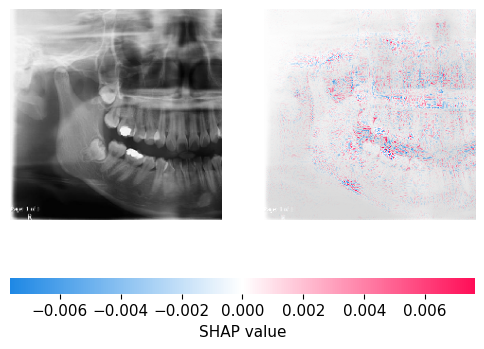

In [75]:
shap_values_E244_23Y_F = explainer_layer2.shap_values(background_test_array[[620]])
%matplotlib inline
shap.image_plot(shap_values_E244_23Y_F, background_test_array[[620]])

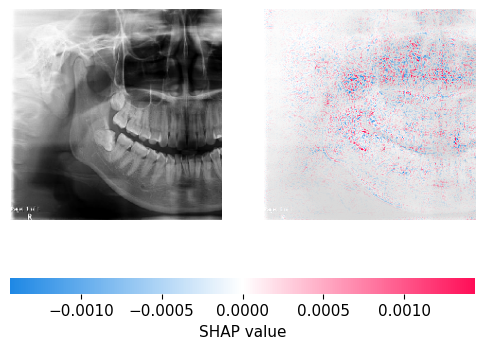

In [76]:
shap_values_E280_23Y_F = explainer_layer2.shap_values(background_test_array[[622]])
%matplotlib inline
shap.image_plot(shap_values_E280_23Y_F, background_test_array[[622]])

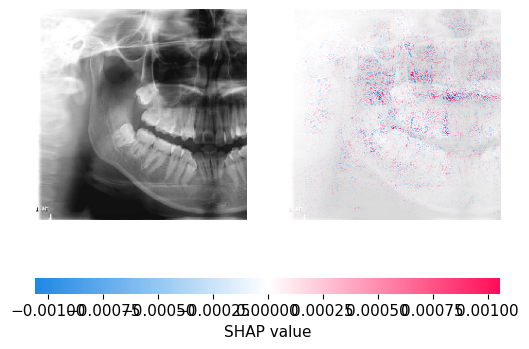

In [77]:
shap_values_FlipE283_23Y_F = explainer_layer2.shap_values(background_test_array[[627]])
%matplotlib inline
shap.image_plot(shap_values_FlipE283_23Y_F, background_test_array[[627]])

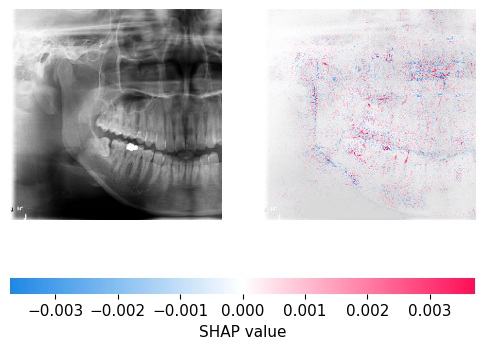

In [78]:
shap_values_FlipE109_23Y_F = explainer_layer2.shap_values(background_test_array[[634]])
%matplotlib inline
shap.image_plot(shap_values_FlipE109_23Y_F, background_test_array[[634]])

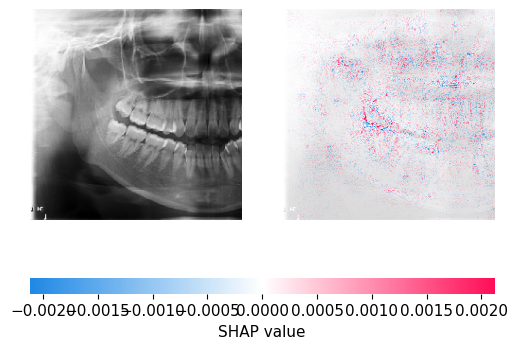

In [79]:
shap_values_FlipE150_23Y_F = explainer_layer2.shap_values(background_test_array[[642]])
%matplotlib inline
shap.image_plot(shap_values_FlipE150_23Y_F, background_test_array[[642]])

#### convert shap value from RGB to grayscale image

In [80]:
type(shap_values_FlipE109_23Y_F)

list

#### E244_23Y_F

In [81]:
#E244_23Y_F
data= [np.array(shap_values_E244_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [82]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

In [83]:
grayscale_neg_thresholded

array([[          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       ...,
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0]])

In [84]:
import numpy as np

total_sum = np.sum(grayscale_neg_thresholded)
print("Total Sum:", total_sum)

# Calculating the mean of all values in the array
mean_value = np.mean(grayscale_neg_thresholded)
print("Mean Value:", mean_value)


Total Sum: 86.91853386111299
Mean Value: 0.0017322730759947583


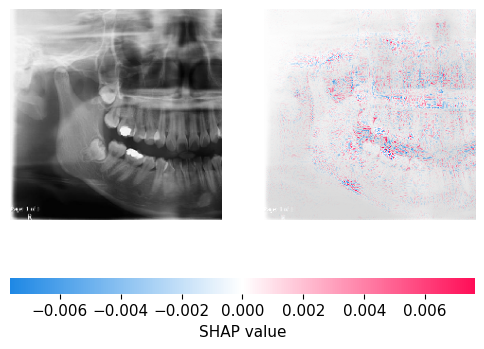

In [85]:
shap.image_plot(shap_values_E244_23Y_F, background_test_array[[620]])

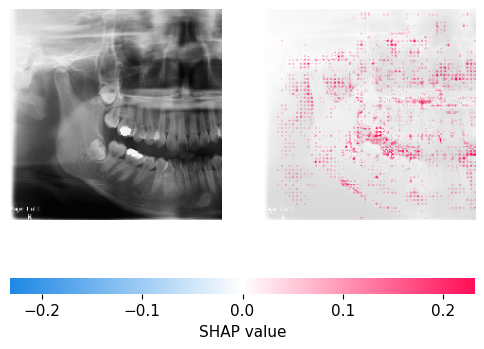

In [101]:
import numpy as np
import shap

# Assuming shap_values_E244_23Y_F is your SHAP values array and background_test_array is your image array
data = np.array(shap_values_E244_23Y_F)  # change list to array
image_array = data[0]  # index in the list that stores the array

positive = np.where(image_array >= 0, image_array, 0)  # separate positive and negative values, negative values will be filled with 0
negative = np.where(image_array < 0, image_array, 0)
negative_aps = np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)

grayscale_image_pos = normalized_positive / 3.0
grayscale_image_neg = normalized_neg / 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=0)  # take the mean along the 0th axis
grayscale_image_negative = np.mean(grayscale_image_neg, axis=0)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

percentile_95_pos = np.percentile(grayscale_image_positive, 95)  # select grayscale_image with percentile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive.copy()
grayscale_neg_thresholded = grayscale_image_negative.copy()

grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0  # set values less than 95th percentile to 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

shap.image_plot(np.array([grayscale_pos_thresholded]), background_test_array[[620]])  # create greyscale image


plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

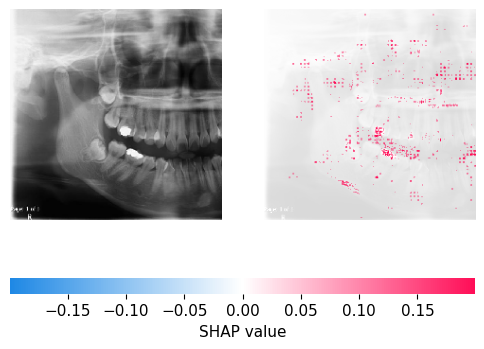

In [100]:
shap.image_plot(np.array([grayscale_neg_thresholded]), background_test_array[[620]])  # create greyscale image

In [1]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming shap_values_E244_23Y_F is your SHAP values array and background_test_array is your image array
data = np.array(shap_values_E244_23Y_F)  # change list to array
image_array = data[0]  # index in the list that stores the array

positive = np.where(image_array >= 0, image_array, 0)  # separate positive and negative values, negative values will be filled with 0
negative = np.where(image_array < 0, image_array, 0)
negative_aps = np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)

grayscale_image_pos = normalized_positive / 3.0
grayscale_image_neg = normalized_neg / 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=0)  # take the mean along the 0th axis
grayscale_image_negative = np.mean(grayscale_image_neg, axis=0)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

percentile_95_pos = np.percentile(grayscale_image_positive, 95)  # select grayscale_image with percentile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive.copy()
grayscale_neg_thresholded = grayscale_image_negative.copy()

grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0  # set values less than 95th percentile to 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

# Create custom colormaps for red and blue
cmap_red = mcolors.LinearSegmentedColormap.from_list("", ["black", "red"])
cmap_blue = mcolors.LinearSegmentedColormap.from_list("", ["black", "blue"])

# Plot the grayscale images with custom colormaps
shap.image_plot(np.array([grayscale_pos_thresholded]), background_test_array[[620]], cmap=cmap_red)  # create grayscale image plot with red
shap.image_plot(np.array([grayscale_neg_thresholded]), background_test_array[[620]], cmap=cmap_blue)  # create grayscale image plot with blue


ModuleNotFoundError: No module named 'shap'

In [86]:
shap_values_E244_23Y_F

[array([[[[ 4.8755e-05, -3.2066e-05, -1.9031e-05],
          [  0.0001042, -3.9626e-05, -3.2029e-05],
          [ 0.00010392, -6.8679e-05, -8.5481e-06],
          ...,
          [-1.6507e-05,   9.241e-05,  1.4053e-06],
          [ 3.0453e-05,  4.7313e-05, -5.5903e-05],
          [ 1.0997e-05, -8.1436e-06, -7.0321e-05]],
 
         [[ 9.1042e-05, -9.2444e-05, -3.7567e-05],
          [ 0.00012262, -7.3621e-05, -3.3906e-05],
          [ 0.00010446, -0.00014954, -6.4004e-06],
          ...,
          [-0.00020241, -6.9986e-05, -2.5278e-05],
          [-7.5041e-05,  8.1634e-05, -2.2498e-05],
          [-4.8513e-05, -2.4614e-05, -6.9459e-05]],
 
         [[  0.0001789, -0.00012483, -3.9009e-05],
          [  0.0002879, -0.00017159, -0.00010847],
          [ 0.00027136, -0.00021591, -7.3977e-05],
          ...,
          [-0.00015397,  5.7258e-05, -7.4026e-05],
          [-4.6057e-05, -1.8462e-05, -8.8678e-05],
          [ 1.6309e-05,  3.6036e-05, -6.4481e-05]],
 
         ...,
 
         [[ 

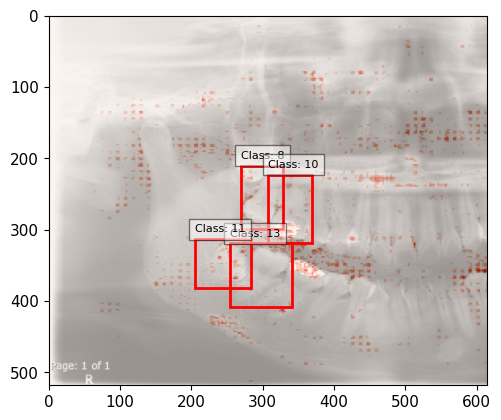

In [87]:
selected_bboxes_E244_23Y_F_pos = plot_bboxes_on_image_pos(Image_E244_23Y_F_path, df_E244_23Y_F_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [88]:
pd.DataFrame(selected_bboxes_E244_23Y_F_pos[0])

,xmin,ymin,xmax,ymax,confidence,class,name
0,253.851403,319.058512,341.424546,407.724200,0.930287,13,Lower Second Molar
1,204.745430,313.292382,284.030266,381.741201,0.922186,11,Lower Third Molar
2,268.974302,210.177315,328.031123,298.810491,0.892715,8,Upper Second Molar
3,307.961410,223.264033,369.051592,319.069720,0.853164,10,Upper First Molar


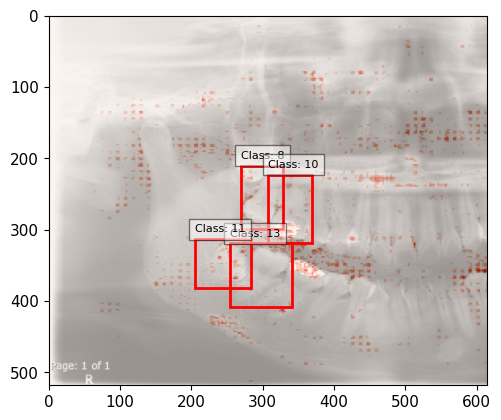

([{'xmin': 253.85140305757523,
   'ymin': 319.0585124492645,
   'xmax': 341.42454624176025,
   'ymax': 407.7242000102997,
   'confidence': 0.9302874803543091,
   'class': 13,
   'name': 'Lower Second Molar'},
  {'xmin': 204.74543005228043,
   'ymin': 313.292382478714,
   'xmax': 284.03026551008224,
   'ymax': 381.74120128154755,
   'confidence': 0.922186017036438,
   'class': 11,
   'name': 'Lower Third Molar'},
  {'xmin': 268.97430247068405,
   'ymin': 210.1773146390915,
   'xmax': 328.0311231613159,
   'ymax': 298.81049060821533,
   'confidence': 0.8927152752876282,
   'class': 8,
   'name': 'Upper Second Molar'},
  {'xmin': 307.9614098072052,
   'ymin': 223.26403313875198,
   'xmax': 369.0515921115875,
   'ymax': 319.0697201490402,
   'confidence': 0.8531637191772461,
   'class': 10,
   'name': 'Upper First Molar'}],
 [0.10657051282051282,
  0.11609195402298851,
  0.11355311355311355,
  0.14079822616407983])

In [89]:
plot_bboxes_on_image_pos(Image_E244_23Y_F_path, df_E244_23Y_F_filtered_nms, grayscale_pos_thresholded)

In [90]:
selected_bboxes_E244_23Y_F_pos[1]

[0.10657051282051282,
 0.11609195402298851,
 0.11355311355311355,
 0.14079822616407983]

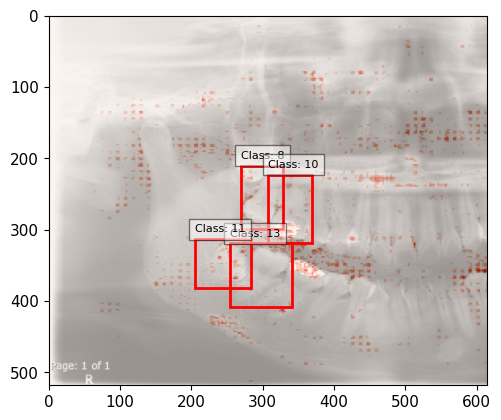

AttributeError: 'tuple' object has no attribute 'groupby'

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

df = plot_bboxes_on_image_pos(Image_E244_23Y_F_path, df_E244_23Y_F_filtered_nms, grayscale_pos_thresholded)

# Ensure this DataFrame 'df' has a column for SHAP values; I'm assuming it's named 'shap_value'
# Calculate the mean SHAP value for each class
mean_shap_values = df.groupby('class')['shap_value'].mean()

# Display the mean SHAP values
print(mean_shap_values)

# Optionally, plot the results
mean_shap_values.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Mean SHAP Value')
plt.title('Mean SHAP Values by Class')
plt.show()

In [ ]:
selected_bboxes_E244_23Y_F_neg = plot_bboxes_on_image_neg(Image_E244_23Y_F_path, df_E244_23Y_F_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_E244_23Y_F_neg[0])

#### E280_23Y_F

In [92]:
#E280_23Y_F
data= [np.array(shap_values_E280_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [93]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

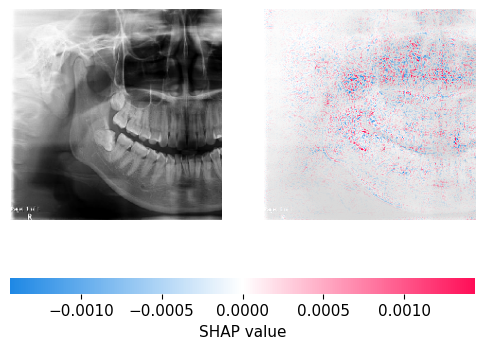

In [94]:
shap.image_plot(shap_values_E280_23Y_F, background_test_array[[622]])

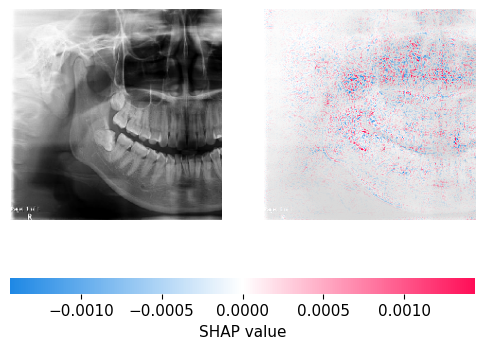

Thresholded grayscale image neg: [[          0           0           0 ...           0           0           0]
 [          0           0           0 ...           0           0           0]
 [          0           0           0 ...           0           0           0]
 ...
 [          0           0           0 ...           0           0           0]
 [          0           0           0 ...           0           0           0]
 [          0           0           0 ...           0           0           0]]


In [95]:
import numpy as np
import shap

# Assuming shap_values_E280_23Y_F is your SHAP values array and background_test_array is your image array
shap.image_plot(shap_values_E280_23Y_F, background_test_array[[622]])

# Assuming grayscale_image_positive and grayscale_image_negative are your grayscale images
percentile_95_pos = np.percentile(grayscale_image_positive, 95)
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = np.copy(grayscale_image_positive)
grayscale_neg_thresholded = np.copy(grayscale_image_negative)

grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

print("Thresholded grayscale image neg:", grayscale_neg_thresholded)


plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

In [ ]:
selected_bboxes_E280_23Y_F_pos = plot_bboxes_on_image_pos(Image_E280_23Y_F_path, df_E280_23Y_F_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_E280_23Y_F_pos[0])

In [ ]:
a = selected_bboxes_E280_23Y_F_pos[1]

In [ ]:
a

In [ ]:
for i in a:
  print(i)


In [ ]:
selected_bboxes_E280_23Y_F_neg = plot_bboxes_on_image_neg(Image_E280_23Y_F_path, df_E280_23Y_F_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_E280_23Y_F_neg)

#### FlipE283_23Y_F

In [ ]:
#FlipE283_23Y_F
data= [np.array(shap_values_FlipE283_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

In [ ]:
shap.image_plot(shap_values_FlipE283_23Y_F, background_test_array[[627]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

In [ ]:
selected_bboxes_FlipE283_23Y_F_pos = plot_bboxes_on_image_pos(Image_FlipE283_23Y_F_path, df_FlipE283_23Y_F_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_FlipE283_23Y_F_pos)

In [ ]:
selected_bboxes_FlipE283_23Y_F_neg = plot_bboxes_on_image_neg(Image_FlipE283_23Y_F_path, df_FlipE283_23Y_F_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_FlipE283_23Y_F_neg)

#### FlipE109_23Y_F

In [ ]:
#FlipE109_23Y_F
data= [np.array(shap_values_FlipE109_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

In [ ]:
shap.image_plot(shap_values_FlipE109_23Y_F, background_test_array[[634]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

In [ ]:
selected_bboxes_FlipE109_23Y_F_pos = plot_bboxes_on_image_pos(Image_FlipE109_23Y_F_path, df_FlipE109_23Y_F_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_FlipE109_23Y_F_pos)

In [ ]:
selected_bboxes_FlipE109_23Y_F_neg = plot_bboxes_on_image_neg(Image_FlipE109_23Y_F_path, df_FlipE109_23Y_F_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_FlipE109_23Y_F_neg)

#### FlipE150_23Y_F

In [ ]:
#FlipE150_23Y_F
data= [np.array(shap_values_FlipE150_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

In [ ]:
shap.image_plot(shap_values_FlipE150_23Y_F, background_test_array[[642]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

In [ ]:
selected_bboxes_FlipE150_23Y_F_pos = plot_bboxes_on_image_pos(Image_FlipE150_23Y_F_path, df_FlipE150_23Y_F_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_FlipE150_23Y_F_pos)

In [ ]:
selected_bboxes_FlipE150_23Y_F_neg = plot_bboxes_on_image_neg(Image_FlipE150_23Y_F_path, df_FlipE150_23Y_F_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_FlipE150_23Y_F_neg)

### Male

#### เลือกรูปที่ต้องการหาค่า SHAP Value

In [ ]:
sdf_test[sdf_test['Age(year)']==23]

In [ ]:
from PIL import Image
Image_E411_23Y_M = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Both/E411.jpg')
Image_E411_23Y_M_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Both/E411.jpg'

Image_E412_23Y_M = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Both/E412.jpg')
Image_E412_23Y_M_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Both/E412.jpg'

Image_FlipE238_23Y_M = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Lt/FlipE238.jpg')
Image_FlipE238_23Y_M_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Lt/FlipE238.jpg'

Image_FlipE274_23Y_M = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Lt/FlipE274.jpg')
Image_FlipE274_23Y_M_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Lt/FlipE274.jpg'

Image_E15_23Y_M = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Rt/E15.jpg')
Image_E15_23Y_M_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Rt/E15.jpg'

In [ ]:
sdf_test.reset_index().iloc[643]

In [ ]:
sdf_test.reset_index().iloc[645]

In [ ]:
sdf_test.reset_index().iloc[647] # check ว่า ตรงไหนจากภาพที่เลทอกมา

In [ ]:
sdf_test.reset_index().iloc[648] # check ว่า ตรงไหนจากภาพที่เลทอกมา

In [ ]:
sdf_test.reset_index().iloc[654] # check ว่า ตรงไหนจากภาพที่เลทอกมา

#### YOLO (detect ตห)

In [ ]:
# YOLO detect ตำแหน่ง
#ภาพ1
results_E411_23Y_M = yolo_model(Image_E411_23Y_M) # results = ผลจากการทำนาย
df_E411_23Y_M = results_E411_23Y_M.pandas().xyxyn[0] #.pandas ทำให้เป็น dataframe // .xyxy ตห.กล่อง ///  n normalization ค่าให้มีค่าอยู่ระหว่าง 0-1 //[0]= index
#ภาพ2
results_E412_23Y_M = yolo_model(Image_E412_23Y_M)
df_E412_23Y_M = results_E412_23Y_M.pandas().xyxyn[0]
#ภาพ3
results_FlipE238_23Y_M  = yolo_model(Image_FlipE238_23Y_M )
df_FlipE238_23Y_M  = results_FlipE238_23Y_M .pandas().xyxyn[0]
#ภาพ4
results_FlipE274_23Y_M = yolo_model(Image_FlipE274_23Y_M)
df_FlipE274_23Y_M = results_FlipE274_23Y_M.pandas().xyxyn[0]
#ภาพ5
results_E15_23Y_M = yolo_model(Image_E15_23Y_M)
df_E15_23Y_M= results_E15_23Y_M.pandas().xyxyn[0]

In [ ]:
results_E15_23Y_M

##### NMS

In [ ]:
df_E411_23Y_M_filtered_nms = nms_per_class(df_E411_23Y_M,iou_threshold=0.5)
df_E412_23Y_M_filtered_nms = nms_per_class(df_E412_23Y_M,iou_threshold=0.5)
df_FlipE238_23Y_M_filtered_nms = nms_per_class(df_FlipE238_23Y_M ,iou_threshold=0.5)
df_FlipE274_23Y_M_filtered_nms = nms_per_class(df_FlipE274_23Y_M,iou_threshold=0.5)
df_E15_23Y_M_filtered_nms = nms_per_class(df_E15_23Y_M,iou_threshold=0.5)

#### SHAP values

In [ ]:
explainer_layer2

In [ ]:
shap_values_E411_23Y_M = explainer_layer2.shap_values(background_test_array[[643]])
%matplotlib inline
shap.image_plot(shap_values_E411_23Y_M, background_test_array[[643]])

In [ ]:
shap_values_E412_23Y_M = explainer_layer2.shap_values(background_test_array[[645]])
%matplotlib inline
shap.image_plot(shap_values_E412_23Y_M, background_test_array[[645]])

In [ ]:
shap_values_FlipE238_23Y_M  = explainer_layer2.shap_values(background_test_array[[647]])
%matplotlib inline
shap.image_plot(shap_values_FlipE238_23Y_M , background_test_array[[647]])

In [ ]:
shap_values_FlipE274_23Y_M = explainer_layer2.shap_values(background_test_array[[648]])
%matplotlib inline
shap.image_plot(shap_values_FlipE274_23Y_M, background_test_array[[648]])

In [ ]:
shap_values_E15_23Y_M = explainer_layer2.shap_values(background_test_array[[654]])
%matplotlib inline
shap.image_plot(shap_values_E15_23Y_M, background_test_array[[654]])

#### convert shap value from RGB to grayscale image

In [ ]:
type(shap_values_FlipE274_23Y_M)

#### E411_23Y_M

In [ ]:
#E411_23Y_M
data= [np.array(shap_values_E411_23Y_M)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

In [ ]:
shap.image_plot(shap_values_E411_23Y_M, background_test_array[[643]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

In [ ]:
selected_bboxes_E411_23Y_M_pos = plot_bboxes_on_image_pos(Image_E411_23Y_M_path, df_E411_23Y_M_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_E411_23Y_M_pos)

In [ ]:
selected_bboxes_E411_23Y_M_neg = plot_bboxes_on_image_neg(Image_E411_23Y_M_path, df_E411_23Y_M_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_E411_23Y_M_neg)

#### E412_23Y_M

In [ ]:
#E412_23Y_M
data= [np.array(shap_values_E412_23Y_M)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

In [ ]:
shap.image_plot(shap_values_E412_23Y_M, background_test_array[[645]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

In [ ]:
selected_bboxes_E412_23Y_M_pos = plot_bboxes_on_image_pos(Image_E412_23Y_M_path, df_E412_23Y_M_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_E412_23Y_M_pos)

In [ ]:
selected_bboxes_E412_23Y_M_neg = plot_bboxes_on_image_neg(Image_E412_23Y_M_path, df_E412_23Y_M_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_E412_23Y_M_neg)

#### FlipE238_23Y_M

In [ ]:
#FlipE238_23Y_M
data= [np.array(shap_values_FlipE238_23Y_M)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

In [ ]:
shap.image_plot(shap_values_FlipE238_23Y_M, background_test_array[[647]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

In [ ]:
selected_bboxes_FlipE238_23Y_M_pos = plot_bboxes_on_image_pos(Image_FlipE238_23Y_M_path, df_FlipE238_23Y_M_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_FlipE238_23Y_M_pos)

In [ ]:
selected_bboxes_FlipE238_23Y_M_neg = plot_bboxes_on_image_neg(Image_FlipE238_23Y_M_path, df_FlipE238_23Y_M_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_FlipE238_23Y_M_neg)

#### FlipE274_23Y_M

In [ ]:
#FlipE274_23Y_M
data= [np.array(shap_values_FlipE274_23Y_M)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

In [ ]:
shap.image_plot(shap_values_FlipE274_23Y_M, background_test_array[[648]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

In [ ]:
selected_bboxes_FlipE274_23Y_M_pos = plot_bboxes_on_image_pos(Image_FlipE274_23Y_M_path, df_FlipE274_23Y_M_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_FlipE274_23Y_M_pos)

In [ ]:
selected_bboxes_FlipE274_23Y_M_neg = plot_bboxes_on_image_neg(Image_FlipE274_23Y_M_path, df_FlipE274_23Y_M_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_FlipE274_23Y_M_neg)

#### E15_23Y_M

In [ ]:
#E15_23Y_M
data= [np.array(shap_values_E15_23Y_M)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

In [ ]:
shap.image_plot(shap_values_E15_23Y_M, background_test_array[[654]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

In [ ]:
selected_bboxes_E15_23Y_M_pos = plot_bboxes_on_image_pos(Image_E15_23Y_M_path, df_E15_23Y_M_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_E15_23Y_M_pos)

In [ ]:
selected_bboxes_E15_23Y_M_neg = plot_bboxes_on_image_neg(Image_E15_23Y_M_path, df_E15_23Y_M_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_E15_23Y_M_neg)